In [1]:
import cv2,os
data_path = 'dataset/'
categories = os.listdir(data_path)
# 'cv2' is the OpenCV library for computer vision. 'os' is the library for interacting with the operating system. This code imports these libraries.
# 'data_path' is the path where the dataset is located.
# 'categories' is a list that stores the names of the subdirectories within the 'data_path' directory.

labels = [i for i in range(len(categories))]
# 'labels' is a list that assigns numerical labels to each category in 'categories'.

label_dict = dict(zip(categories,labels)) #empty dictionary
# 'label_dict' is a dictionary that maps categories to their respective numerical labels.


In [2]:
print(categories)
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [3]:
img_size_x = 224
img_size_y = 224
data = []
label = []

# 'img_size_x' and 'img_size_y' are the desired dimensions for resizing the images. 
# 'data' and 'label' are lists that will store the resized images and their corresponding labels.

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    # 'folder_path' is the path to the specific category's folder.
    # 'img_names' is a list that stores the names of the image files in the current category's folder.
        
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
        # 'img_path' is the complete path of the current image.
        # 'img' is the image read using OpenCV.
        
        try:
            # Resizing the image to the desired dimensions without converting to grayscale.
            resized = cv2.resize(img, (img_size_x, img_size_y))
            data.append(resized)
            label.append(label_dict[category])
            # Appending the image and the label (categorized) into the list (dataset).
        except Exception as e:
            print('Exception:', e)
            # If any exception is raised, the exception will be printed here. And pass to the next image.

In [4]:
import numpy as np

data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size_x,img_size_y,3))
# Convert 'data' to a NumPy array, normalize the pixel values, and reshape the array to be suitable for the CNN model.

label = np.array(label)
# from tensorflow.keras.utils import to_categorical
# new_label = to_categorical(label)
# # Convert the numerical labels into categorical labels using one-hot encoding.

In [5]:
data.shape

(4681, 224, 224, 3)

categorical_crossentropy ( cce ) produces a one-hot array containing the probable match for each category, sparse_categorical_crossentropy ( scce ) produces a category index of the most likely matching category.

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
# Import necessary modules and functions from Keras for building and training the CNN model.


model = Sequential()
# Create a sequential model.

model.add(Conv2D(32,(3,3),input_shape = data.shape[1:]))  # data.shape[1],data.shape[2],data.shape[3] == (400,400,1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation = 'relu'))
#Dense layer of 128 neurons
# Add a fully connected layer with 128 neurons and ReLU activation.

model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
#Dense layer of 64 neurons
# Add another fully connected layer with 64 neurons and ReLU activation.

model.add(Dense(26,activation = 'softmax'))
# Add the output layer with 26 neurons and sigmoid activation since the problem seems to involve 26 classes.

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Compile the model with binary crossentropy loss and the Adam optimizer.

c:\Users\Ankita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,798,362 (10.67 MB)

 Trainable params: 2,798,362 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.1)
# Split the data into training and testing sets.

In [9]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)
# Train the model using the training data, for 10 epochs, with a validation split of 20%.

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 50s 403ms/step - accuracy: 0.2811 - loss: 2.4638 - val_accuracy: 0.9300 - val_loss: 0.2411
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 46s 430ms/step - accuracy: 0.9128 - loss: 0.2789 - val_accuracy: 0.9846 - val_loss: 0.0726
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 43s 405ms/step - accuracy: 0.9669 - loss: 0.1048 - val_accuracy: 0.9846 - val_loss: 0.0800
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 395ms/step - accuracy: 0.9741 - loss: 0.0678 - val_accuracy: 0.9881 - val_loss: 0.0397
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 44s 412ms/step - accuracy: 0.9777 - loss: 0.0612 - val_accuracy: 0.9881 - val_loss: 0.0417
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 386ms/step - accuracy: 0.9872 - loss: 0.0387 - val_accuracy: 0.9929 - val_loss: 0.0231
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 391ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9917 - val_loss: 0.0273
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 391ms/step - accuracy: 0.9928 - loss: 0

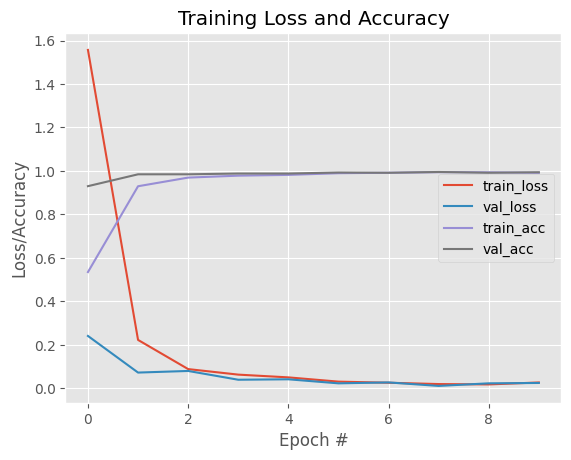

In [10]:
import matplotlib.pyplot as plt
# Import the matplotlib library for plotting.

# # plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model") # Plot and save the training loss and accuracy figures.

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate precision, recall, and F1 score
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Define a function to plot the confusion matrix
# def plot_confusion_matrix(y_true, y_pred, classes):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
#     plt.title('Confusion Matrix')
#     plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predict the test set labels
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate metrics
test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

# Calculate and plot confusion matrix
# plot_confusion_matrix(y_test, y_pred, 26)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9894 - loss: 0.0654
Test Accuracy: 0.9914712309837341
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step
Test Accuracy: 0.9914712153518124
Precision: 0.9919447290449422
Recall: 0.9914712153518124
F1 Score: 0.9914824886756318
